In [2]:
import os
import soundfile as sf
import librosa
import numpy as np
import ntpath
import matplotlib.pyplot as plt
# from librosa import display
import librosa.display

import sys
import pandas as pd
import matplotlib
import json

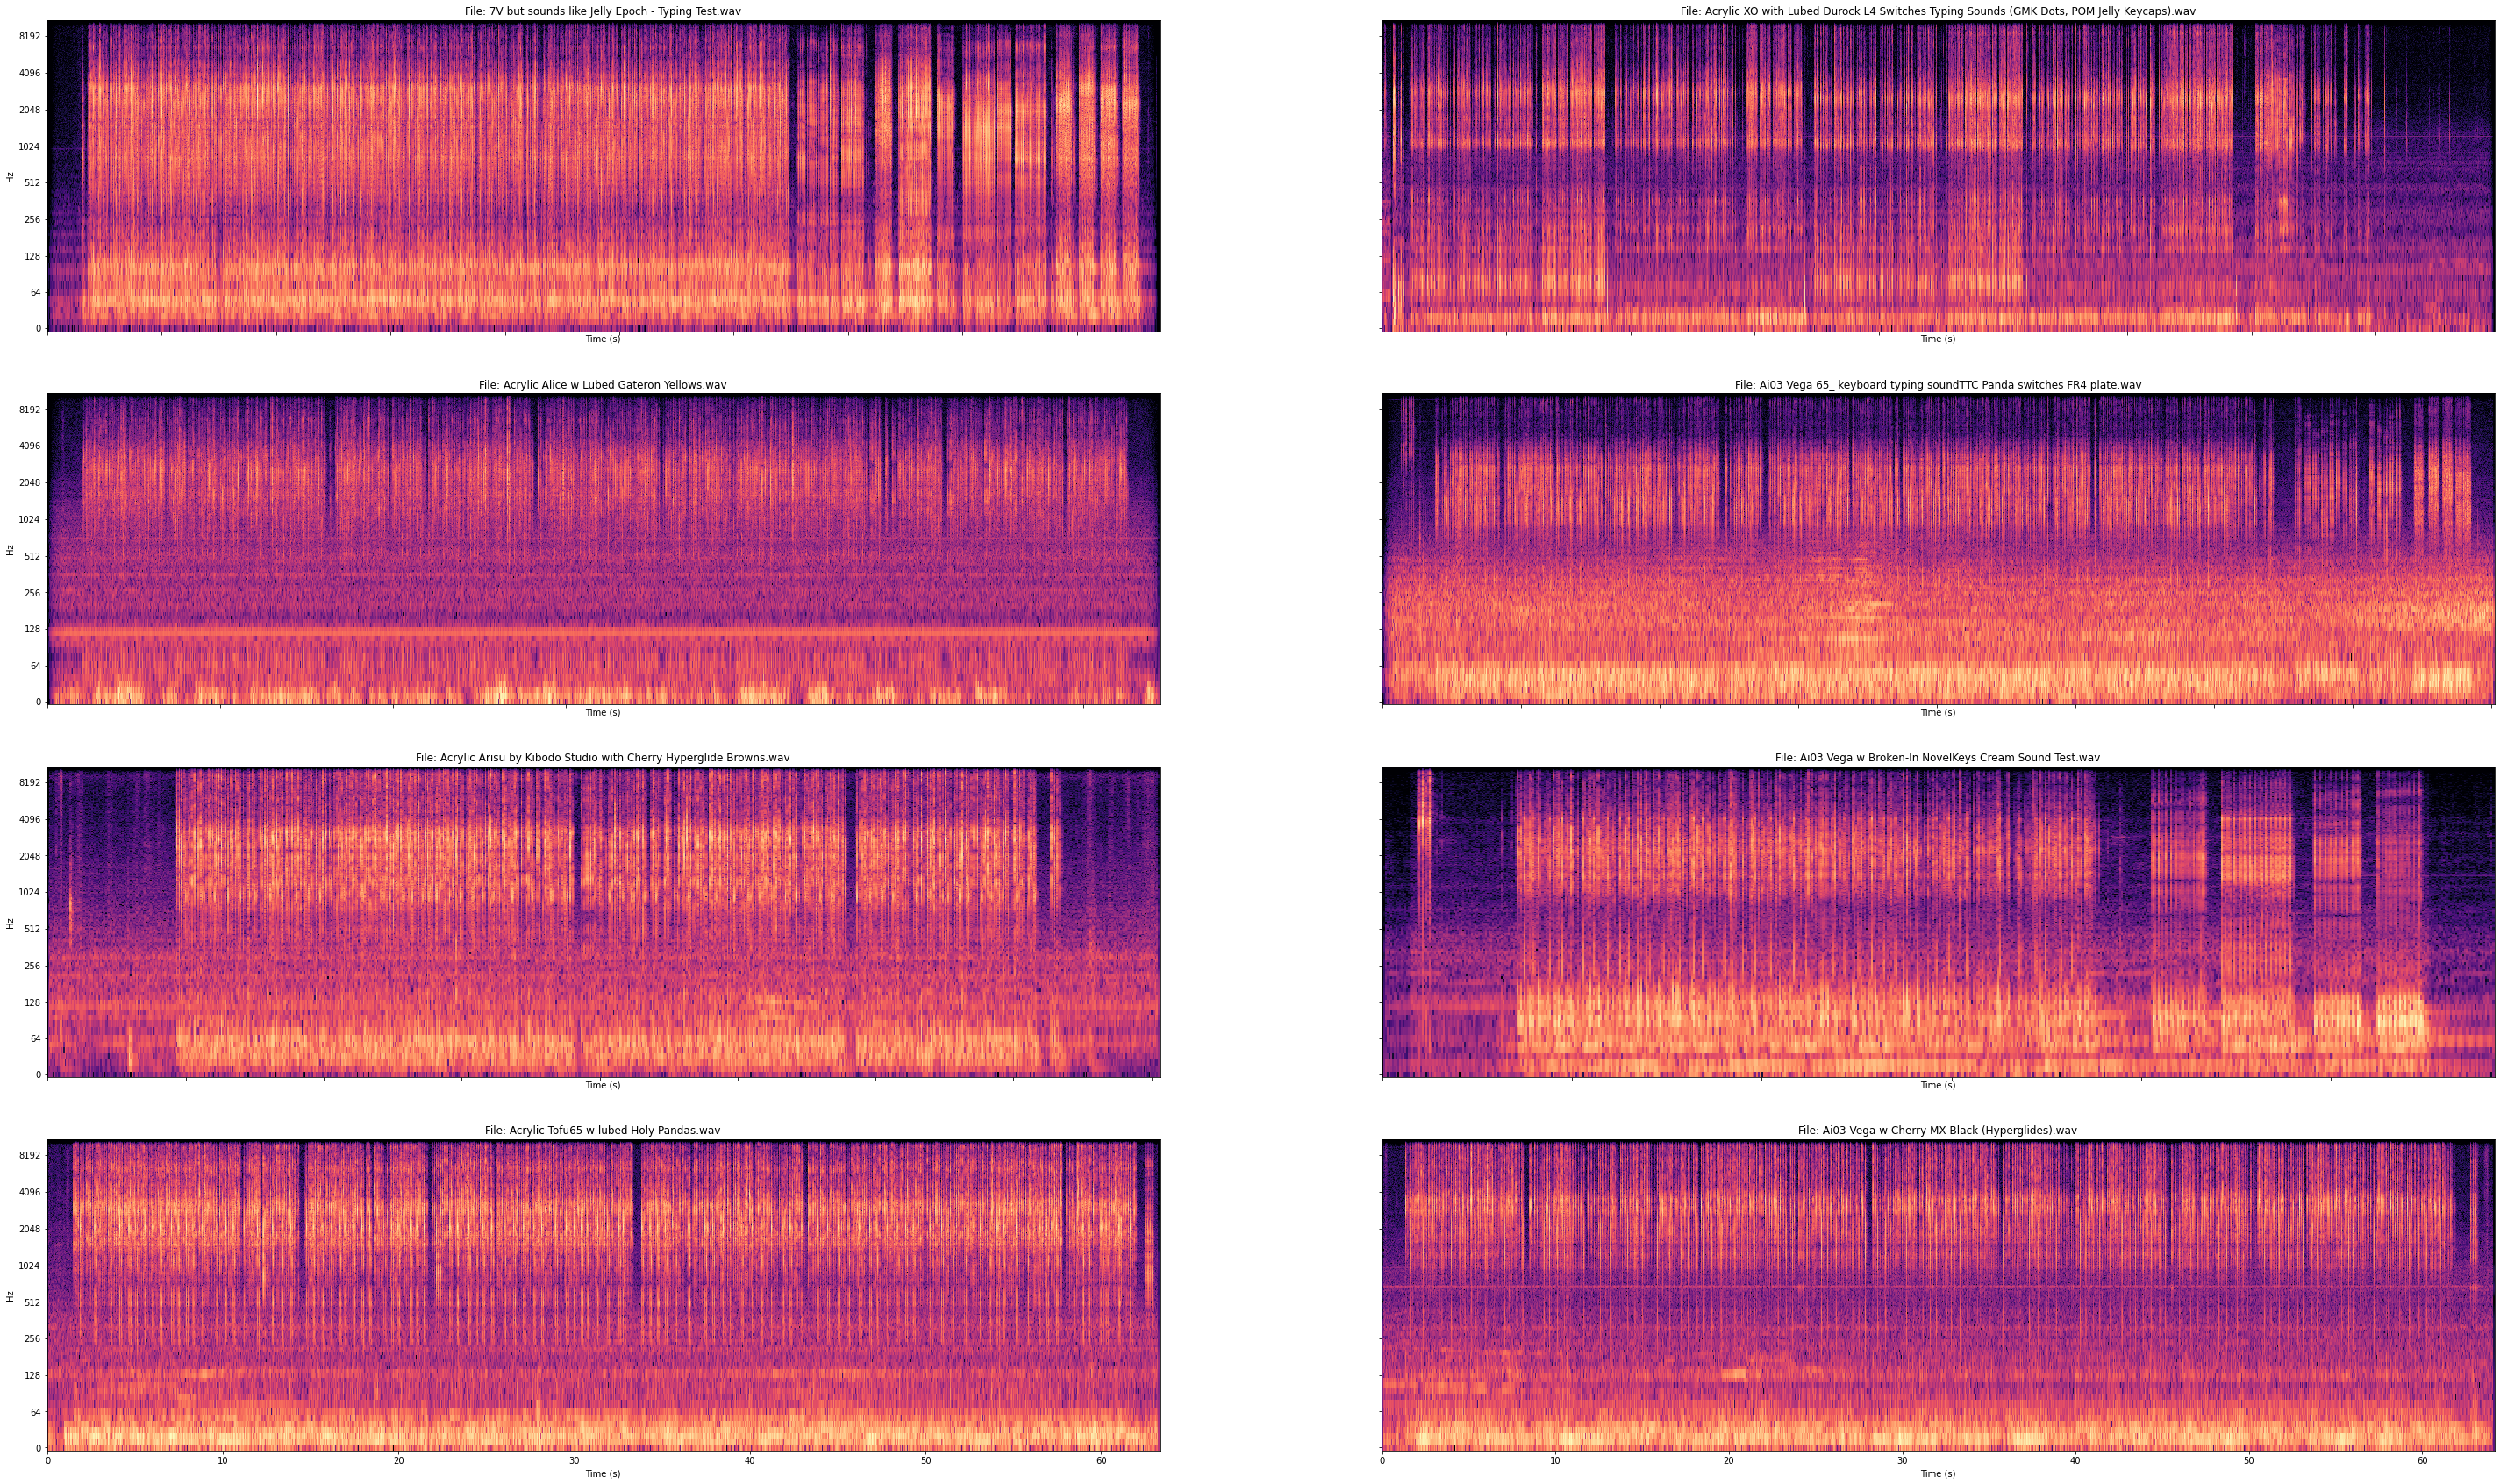

In [14]:
with open('fileLocations.json') as json_file:
    data = json.load(json_file)

path = os.getcwd() + "/datasets/" 

audios = []

currentFolder = "/Assorted Channels/"

for file in data["Assorted Channels"]:
    audios.append(file)
    

    
fig = plt.figure(figsize=[50, 30])
numRowsX = 2
numRowsY = 4
ax = []
for i in range(numRowsX):
    for j in range(numRowsY):
        ax.append(plt.subplot2grid((numRowsY, numRowsX), (j, i)))
        
    
for i in range(numRowsX*numRowsY):
    times = np.arange(100)
    values = np.random.randn(len(times))
    hop_length = 1024
    y, sr = librosa.load(path+currentFolder + audios[i])
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref = np.max)
    img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[i])
    #img = librosa.display.waveshow(y, sr=sr, ax=ax[i])
    ax[i].set(title = "File: " + audios[i])
    ax[i].label_outer()
    ax[i].xaxis.set_major_formatter(librosa.display.TimeFormatter(unit='s'))
    ax[i].set(xlabel='Time (s)')
    
    






In [17]:
csvs = {}
for outerFolder in os.listdir(os.getcwd() + "/datasets/"):
    tempList = []
    for file in os.listdir(os.getcwd() + "/datasets/"+ outerFolder):
        tempList.append(file)
    csvs[outerFolder] = tempList
with open('fileLocations.json', 'w') as outfile:
    json.dump(csvs, outfile)

In [3]:
with open('fileLocations.json') as json_file:
    data = json.load(json_file)

print(data.keys())


dict_keys(['Assorted Channels', 'filled types', 'Taeha Types'])
